## ライブラリのインポートとデータセットの用意
## Importing libraries and preparing data sets


In [6]:
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 
# use seaborn plotting defaults
import seaborn as sns; sns.set()

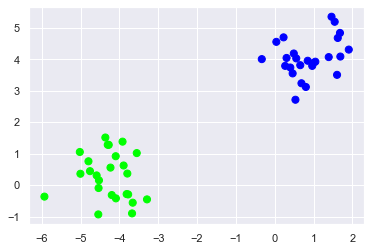

In [7]:
# from sklearn.datasets.samples_generator import make_blobs  # old code
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=3, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg')

## クラスによるデータの決定境界
## Data decision boundaries by class

(-2.0, 6.0)

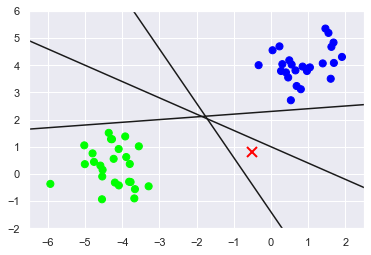

In [9]:
xfit = np.linspace(-6.5, 2.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg')
plt.plot([-0.5], [0.8], 'x', color='red', markeredgewidth=2, markersize=10)

# draw several dividing lines that perfectly separate the two classes
for m, b in [(0.1, 2.3), (-0.6, 1), (-2, -1.4)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-6.5, 2.5)
plt.ylim(-2, 6)

## マージンの導入
## Introduction of margins

(-2.0, 6.0)

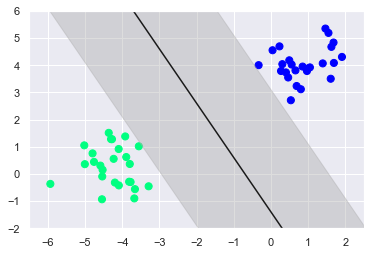

In [11]:
xfit = np.linspace(-6.5, 2.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b, d in [(0.1, 2.3, 0.2), (-0.6, 1, 1.8), (-2, -1.4, 4.5)]:
    yfit = m * xfit + b
plt.plot(xfit, yfit, '-k')
plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
color='#AAAAAA', alpha=0.4)

plt.xlim(-6.5, 2.5)
plt.ylim(-2, 6)

## SVMのフィッティングと学習した決定境界の表示
## SVM fitting and display of learned decision boundaries

In [12]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

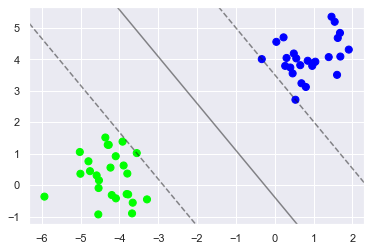

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg')
plot_svc_decision_function(model)

## 異なるトレーニングデータ数での結果の比較
## Comparison of results for different numbers of training data

In [27]:
def plot_svm(N, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

from ipywidgets import interact, fixed
# define N
# interact(plot_svm, N=[10, 50, 100, 200], ax=fixed(None))
interact(plot_svm, N=100, ax=fixed(None))

interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), Output()), _dom_classes=('widg…

<function __main__.plot_svm(N, ax=None)>

### Reference
https://avinton.com/academy/svm/